### Topics: Pivot table, Correlation, Pairplot, and Heatmap

We will use the same baseball data set for this lab.
Here are the details for your reference.
This dataset contains data concerning a baseball team's performance in a given year. It has the following variables:

Team: A code for the name of the team

League: The Major League Baseball league the team belongs to, either AL (American League) or NL (National League)

Year: The year of the corresponding record

RS: The number of runs scored by the team in that year

RA: The number of runs allowed by the team in that year

W: The number of regular-season wins by the team in that year

OBP: The on-base percentage of the team in that year

SLG: The slugging percentage of the team in that year

BA: The batting average of the team in that year

Playoffs: Whether the team made the playoffs in that year (1 for yes, 0 for no)

RankSeason: Among the playoff teams in that year, the ranking of their regular season records (1 is best)

RankPlayoffs: Among the playoff teams in that year, how well they fared in the playoffs. The team winning the World Series gets a RankPlayoffs of 1.

G: The number of games a team played in that year

OOBP: The team's opponents' on-base percentage in that year

OSLG: The team's opponents' slugging percentage in that year

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpt
import matplotlib.pyplot as plt
import seaborn as sns

#### Points: 15 + 20 +15 = 50

### Problem 1
Pivot Table in Pandas.
A pivot table is a data processing tool used to query, organize, and summarize data or information between spreadsheets, tables, or databases. Many companies and software vendors use the generic pivot table term. PivotTable, Microsoft branded and trademarked version, is used in most Excel products. We will use PivotTable in pandas. A pivot table is helpful when analyzing a large amount of data, as it allows users to apply specific criteria to summarize, organize and reorganize data tables, and create reports. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html

Upload the baseball.csv data and remove 4 variables that have a high number of null values. If there are more missing values then use dropna function. 
Find two pivot tables using the cleaned baseball data set. You can decide to use various columns as indices or values that make sense to you. Also, explain why we'd want to create a table like these (meaning: In what way is this information on the pivot helpful?)

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpt
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('baseball.csv')

In [5]:
data.isnull().sum()

Team              0
League            0
Year              0
RS                0
RA                0
W                 0
OBP               0
SLG               0
BA                0
Playoffs          0
RankSeason      988
RankPlayoffs    988
G                 0
OOBP            812
OSLG            812
dtype: int64

In [7]:
data1 = data.dropna()

In [8]:
data1.isnull().sum()

Team            0
League          0
Year            0
RS              0
RA              0
W               0
OBP             0
SLG             0
BA              0
Playoffs        0
RankSeason      0
RankPlayoffs    0
G               0
OOBP            0
OSLG            0
dtype: int64

In [12]:
table = pd.pivot_table(data1, values='Team', index=['League', 'Playoffs'], columns=['Year'], aggfunc=np.sum)
table

,Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
League,Playoffs,,,,,,,,,,,,,,
AL,1,BOSCLENYYTEX,CHWNYYOAKSEA,CLENYYOAKSEA,ANAMINNYYOAK,BOSMINNYYOAK,ANABOSMINNYY,BOSCHWLAANYY,DETMINNYYOAK,BOSCLELAANYY,BOSCHWLAATBR,BOSLAAMINNYY,MINNYYTBRTEX,DETNYYTBRTEX,BALDETNYYOAKTEX
NL,1,ARIATLHOUNYM,ATLNYMSFGSTL,ARIATLHOUSTL,ARIATLSFGSTL,ATLCHCFLASFG,ATLHOULADSTL,ATLHOUSDPSTL,LADNYMSDPSTL,ARICHCCOLPHI,CHCLADMILPHI,COLLADPHISTL,ATLCINPHISFG,ARIMILPHISTL,ATLCINSFGSTLWSN


A pivot table helps break down certain information, in this case in a two dimensional table that gives multidimensional summary of the data.

### Problem 2
Correlation coefficient: We have talked about correlation and what it means in our lecture. Correlation coefficent is a number that measures how two columns are correlated. There are many kinds of correlation coefficients. We will use Pearson's Correlation coefficient. Given that the variables x and y have data points $x_1, x_2,..., x_n$ and $y_1, y_2,.., y_n$ then the correlation coefficient is defined by $r_{xy}=\dfrac{\displaystyle{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}}{\sigma_x\, \sigma_y}$. The number
$r_{xy}$ is the correlation coefficient. It's value ranges from -1 to 1. Correlation coefficent of -1 means highest possible negative correlation, 0 means no correlation and 1 means highest possible positive correlation.
$\bar{x}$ and $\bar{y}$ are means of x and y respectively. Here, $\sigma_x$ and $\sigma_y$  are standard deviations of x and y, respectively. You do not have to worry about the complicated looking formula. We will use pandas to find the correlation. Read about corr function here. https://www.w3resource.com/pandas/dataframe/dataframe-corr.php

Find correlations of all the variables with all the variables.  Find out how to read a correlation table and answer the following. 

In [20]:
data1.corr()

,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
Year,1.000000,-0.479926,-0.380526,-0.213686,-0.485039,-0.400052,-0.369794,NaN,0.080417,0.047934,0.141489,-0.378351,-0.218759
RS,-0.479926,1.000000,0.710028,0.361450,0.888808,0.880062,0.758320,NaN,-0.360962,-0.001477,-0.011983,0.560603,0.522274
RA,-0.380526,0.710028,1.000000,-0.203230,0.647268,0.676111,0.573806,NaN,0.069920,0.053172,-0.001796,0.822528,0.838412
W,-0.213686,0.361450,-0.203230,1.000000,0.257251,0.288486,0.209495,NaN,-0.764191,-0.004507,-0.072444,-0.276118,-0.227389
OBP,-0.485039,0.888808,0.647268,0.257251,1.000000,0.731171,0.792169,NaN,-0.264424,-0.047524,0.002867,0.554631,0.451819
SLG,-0.400052,0.880062,0.676111,0.288486,0.731171,1.000000,0.693675,NaN,-0.268387,-0.077998,-0.037518,0.514024,0.520692
BA,-0.369794,0.758320,0.573806,0.209495,0.792169,0.693675,1.000000,NaN,-0.164299,-0.108597,-0.004184,0.424771,0.426571
Playoffs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RankSeason,0.080417,-0.360962,0.069920,-0.764191,-0.264424,-0.268387,-0.164299,NaN,1.000000,-0.007525,0.065533,0.097731,0.050111
RankPlayoffs,0.047934,-0.001477,0.053172,-0.004507,-0.047524,-0.077998,-0.108597,NaN,-0.007525,1.000000,-0.011897,0.065808,0.087089


(a) Which two different variables are highly negatively correlated?

Two variables that are highly negatively correlated are RS and OBP.

(b) Which two different variables are highly positively correlated?

Two variables that are highly positively correlated are W and RankSeason.

(c) Which two different variables are least correlated?

Two variables that are least correlated are RS and RankPlayoffs.

(d) Why does the output matrix has 1 in the diagonal?

The variables that 1 represents are the variables themselves so they will always be 1. Correlation between a,b is the same as between b,a so if a and b are the same variable, then they have to be 1.

### Problem 3
Pairwise plot and Heatmap: Pair plot is the scatterplot of every two pairs of variables in the data. A correlation heatmap uses colored cells, typically in a monochromatic scale, to show a 2D correlation matrix (table) between two discrete dimensions or event types. The first dimension values appear as rows of the table, while the table's columns represent the values of the second dimension. The color value of the cells is proportional to the number of measurements that match the dimensional values. This enables you to identify incidence patterns quickly and to recognize anomalies.
Heatmap is a very popular graphing technique. You see it everywhere, from weather data analysis to web page analytics. Read more following the links here.
https://seaborn.pydata.org/generated/seaborn.pairplot.html

https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec

a) Find the pair plot of the baseball data frame and make a few observations.

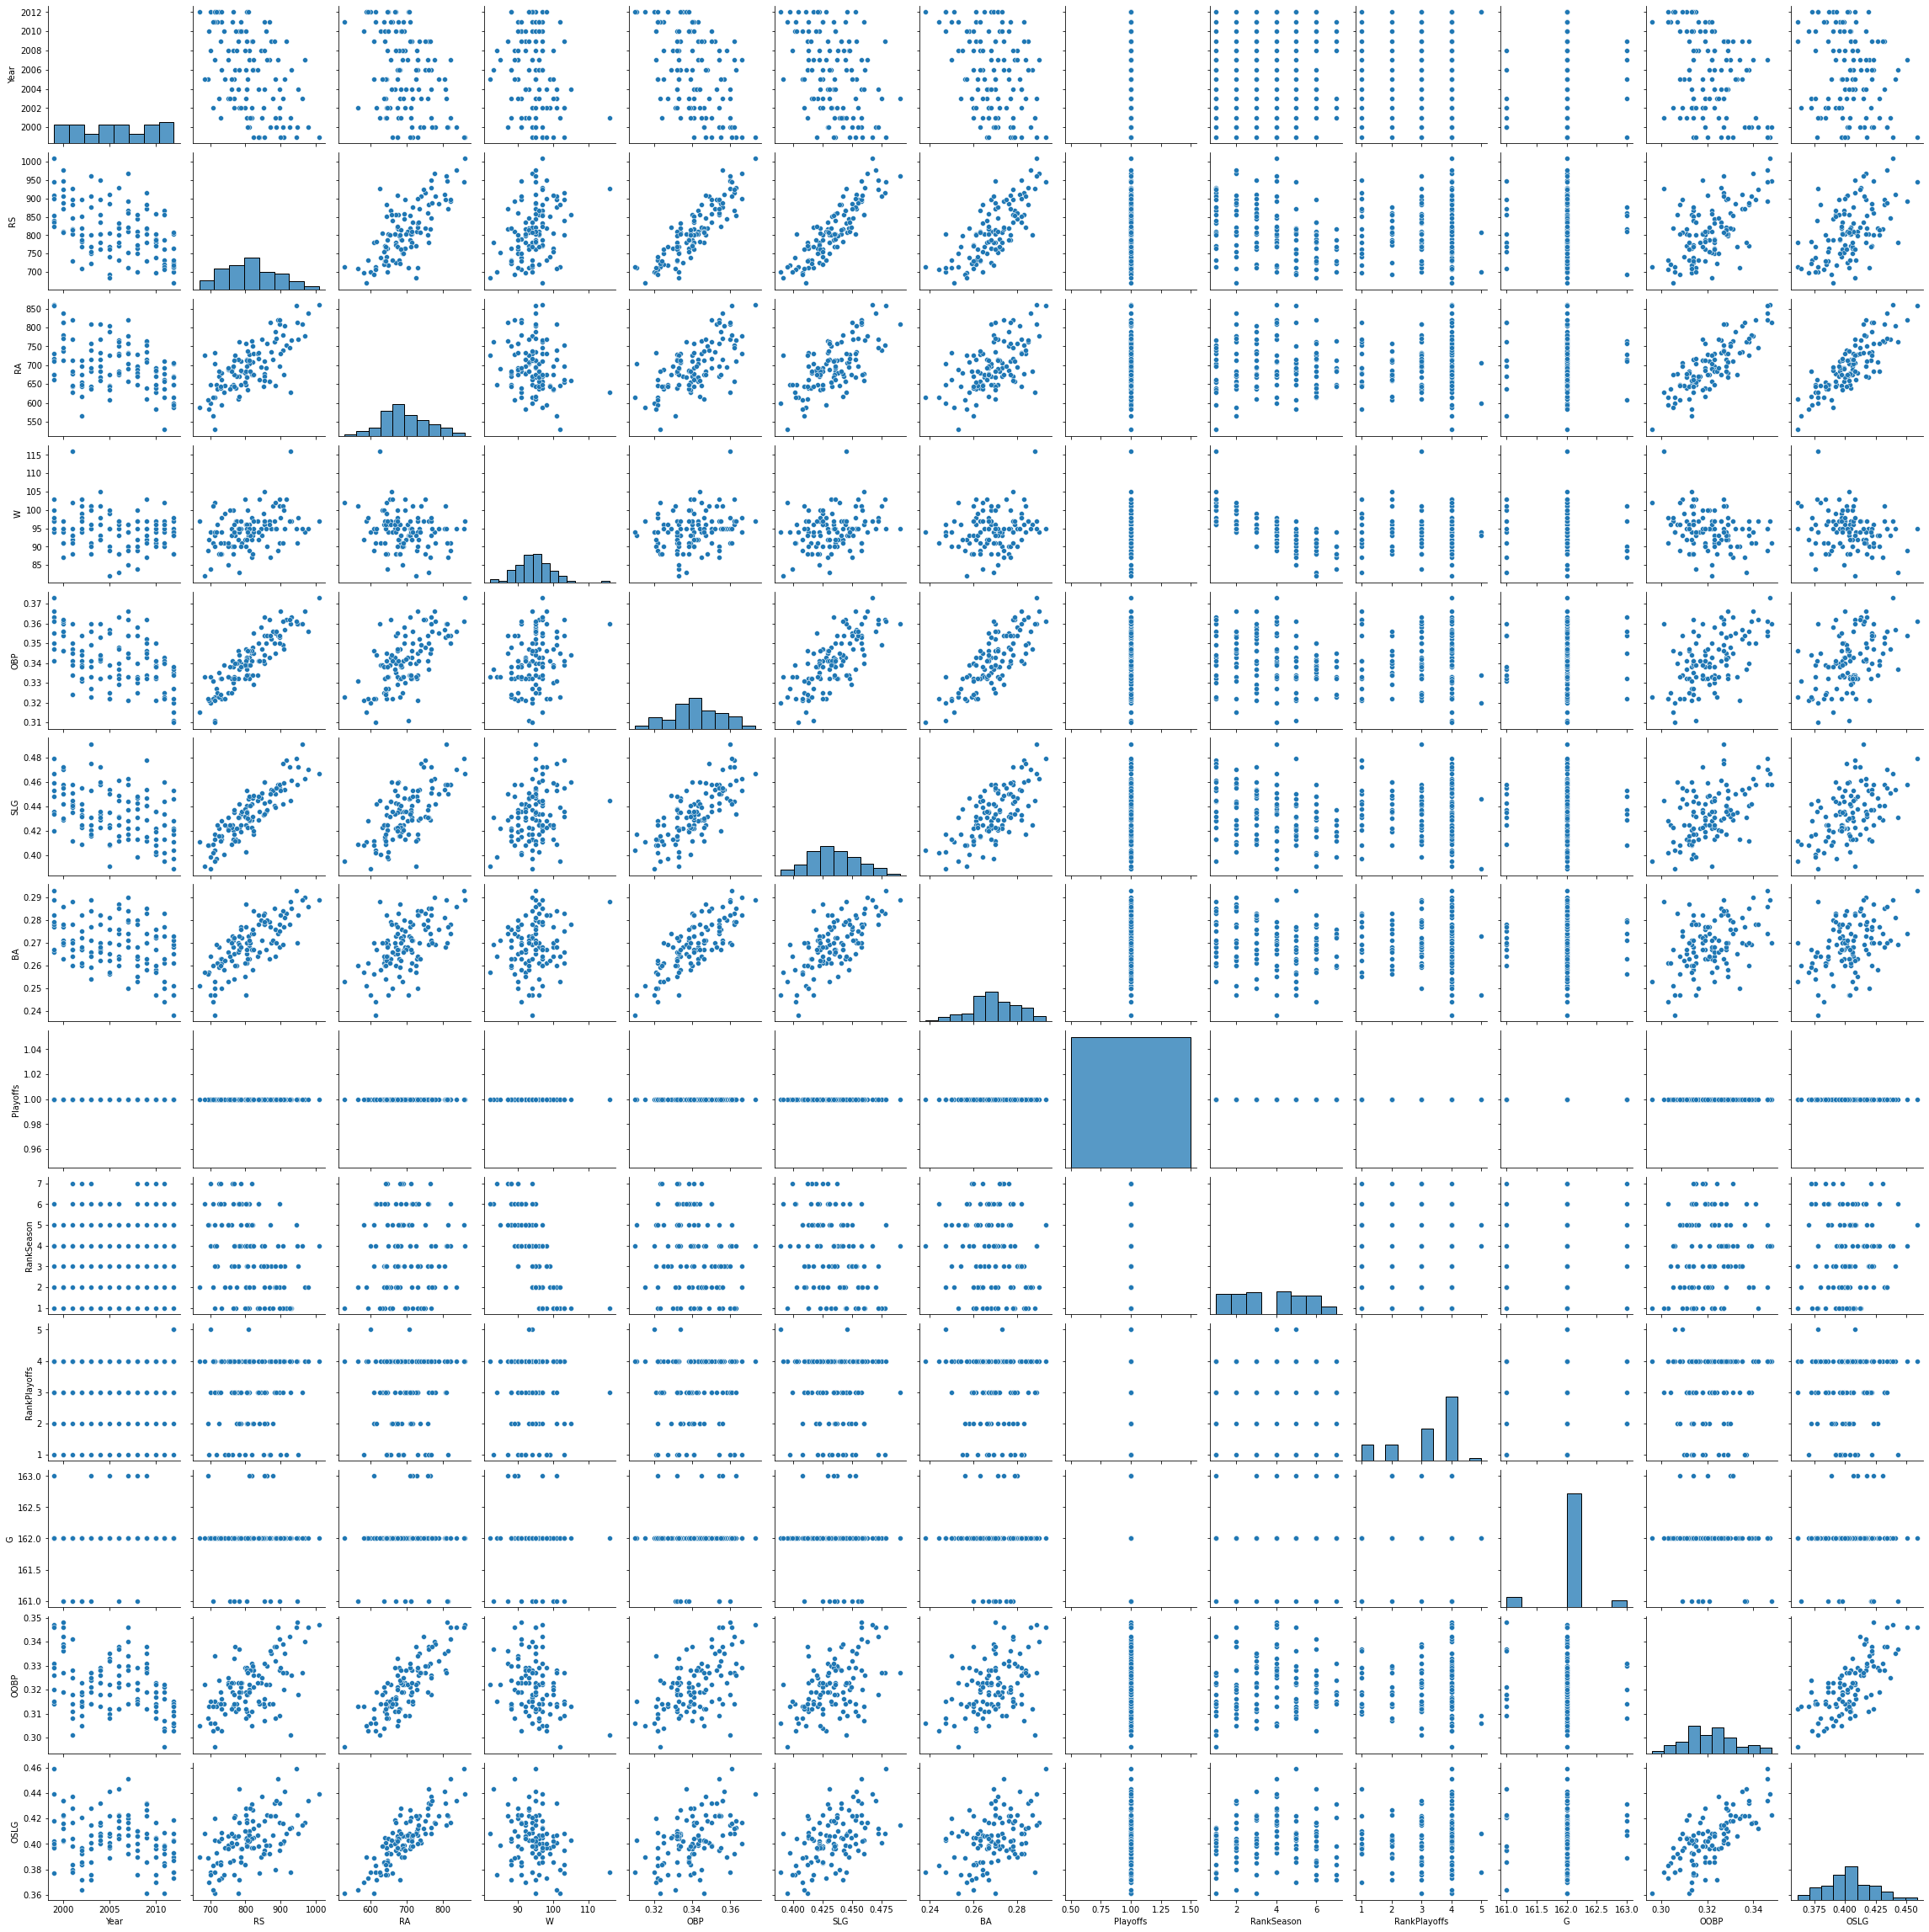

In [21]:
sns.pairplot(data1)

These plots show us trends between two variables. You can tell what the distribution looks like or what the correlation is between the variables based on the direction of the data. It also shows us which variables are highly or not highly skewed.

b) Plot the correlation heatmap and make a few observations.

Text(0.5, 1.0, 'Correlation Heatmap')

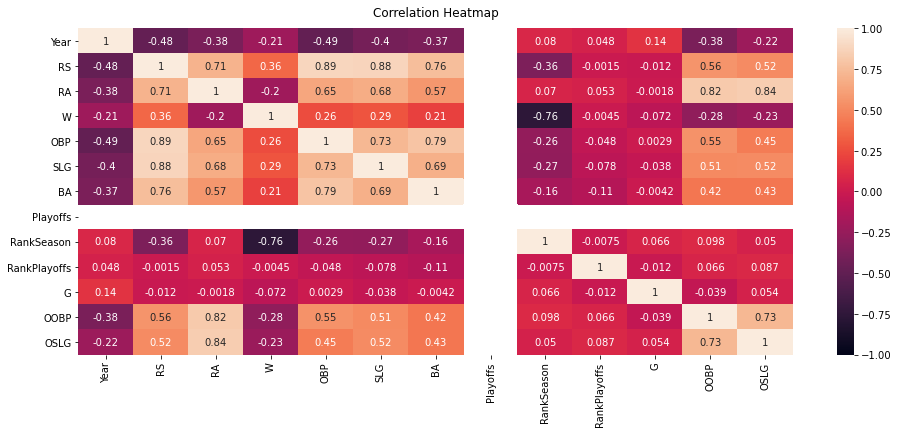

In [22]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data1.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

The correlation heatmap shows in color the correlations between variables. It's displayed like a correlation table but it is visually easier to see how if the correlations between the variables are positive or negative.